# ロジスティクス回帰の実装

このページでは、ロジスティクス回帰の実装を行っています。

## 注意事項

- 「Googleへのログインが必要」と出たら、自分のGoogleアカウントでログインします。

- 「警告: このノートブックは Google が作成したものではありません。」と出たら「このまま実行」をクリックします。

このコードは、2つの特徴量を持つ2クラスの分類用ダミーデータを生成し、ロジスティック回帰モデルを訓練します。データを訓練セットとテストセットに分割し、モデルの精度と分類レポートを表示します。最後に、決定境界をプロットしてデータポイントを可視化します。

Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.80      0.86      0.83        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



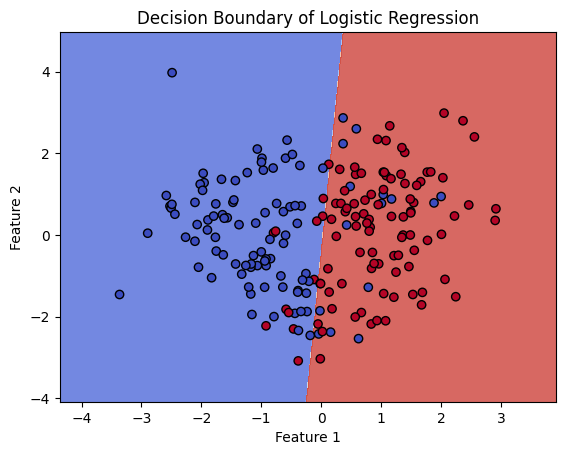

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. データ作成
# 2クラス分類用のダミーデータを作成
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# 2. データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. モデルの訓練
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. 予測
y_pred = model.predict(X_test)

# 5. 結果の評価
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 6. 結果の表示
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')
plt.show()
